<a href="https://colab.research.google.com/github/HeisenbergHK/MNIST-Digit-Classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

import seaborn as sns

np.random.seed(0)

## Data


In [52]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualization


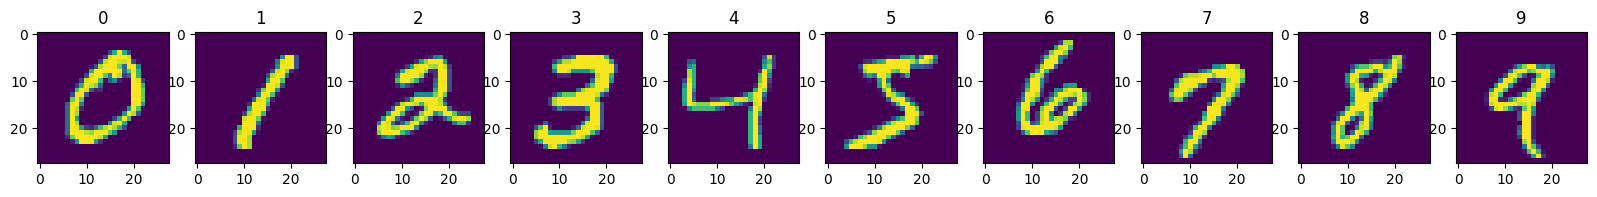

In [55]:
number_of_classes = 10
f, ax = plt.subplots(1, number_of_classes, figsize=(20, 20))

for i in range(0, number_of_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample)
  ax[i].set_title(i)

## Generate classes

In [56]:
y_train = keras.utils.to_categorical(y_train, num_classes=number_of_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=number_of_classes)

In [57]:
for i in range(10):
  print(y_test[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Prepare Data

In [58]:
# Normalizing the data (0.0 - 1.0)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshaping from 28x28 to 784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape

(60000, 784)

## Create Model - Fully Connected Neural Network

In [59]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [60]:
# The model will process 512 samples at a time before updating the weights
batch_size = 512

# The model will go through the entire dataset 10 times
epochs = 10

# Traing the model
model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7032 - loss: 1.0247
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9316 - loss: 0.2331
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9495 - loss: 0.1709
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9591 - loss: 0.1409
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9673 - loss: 0.1111
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9709 - loss: 0.0960
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9762 - loss: 0.0789
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9782 - loss: 0.0712
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9812 - loss: 0.0609
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9834 - loss: 0.0529


## Check Performance

In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9715 - loss: 0.0904
Test loss: 0.07654930651187897, Test accuracy: 0.9767000079154968


## Evaluation

In [62]:
# We used softmax, noe the model has a prediction for each possible output
# np.argmax find the maximum numbers that the model predicted so we will only
# have prediction classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


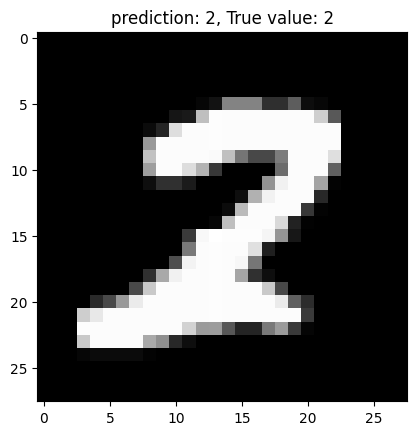

In [67]:
# Single example
random_index = np.random.choice(len(X_test))

X_sample = X_test[random_index]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_index]
y_pred_sample_class = y_pred_classes[random_index]

plt.title(f"prediction: {y_pred_sample_class}, True value: {y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray")

## Confusion Matrix


Text(0.5, 1.0, 'Confusion Matrix')

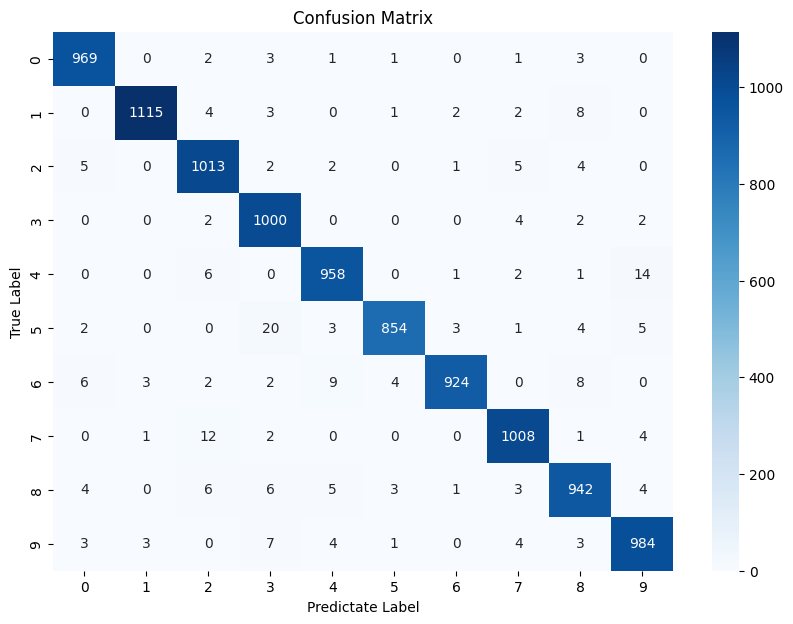

In [84]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel("Predictate Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")



## Investigating Errors

In [89]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

In [99]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-10:] # 5 last ones

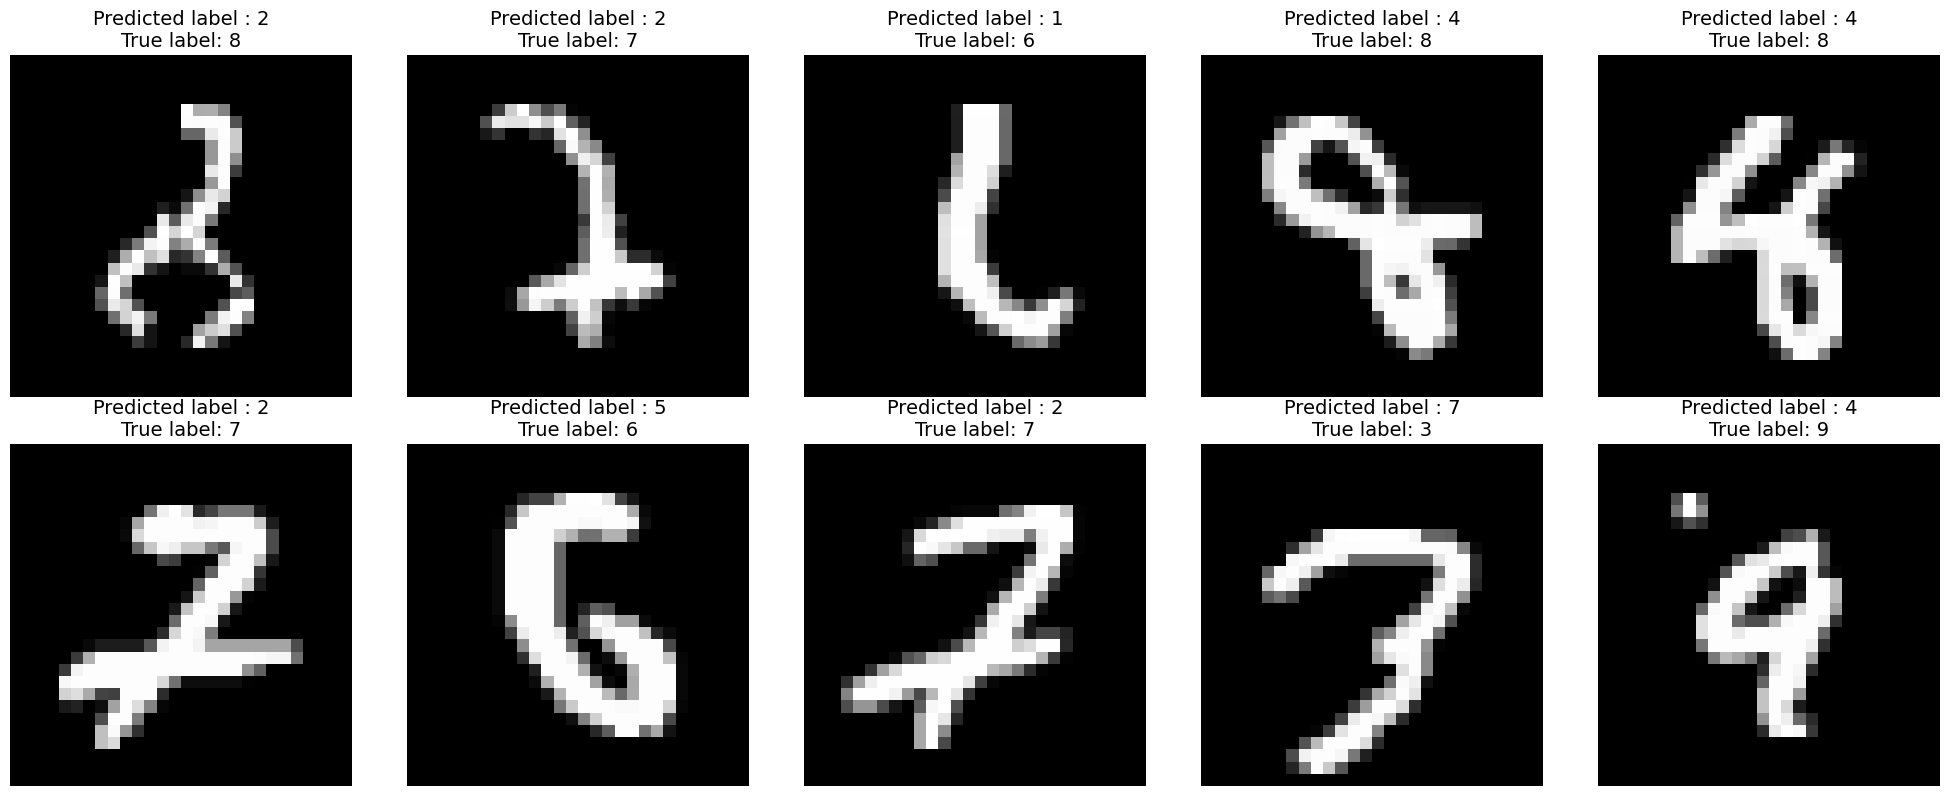

In [107]:
# Show Top Errors
num = len (top_idx_diff_errors)
f, ax = plt.subplots(2, 5, figsize=(20,8))

ax = ax.flatten()

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = X_test_errors[idx].reshape(28,28)

  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]

  ax[i].imshow(sample, cmap='gray')

  ax[i].set_title(f"Predicted label : {y_p}\nTrue label: {y_t}", fontsize=14)
  ax[i].axis('off')

plt.tight_layout()